<a href="https://colab.research.google.com/github/HauwaUmar/DATA-6100/blob/main/Final%20Project%20Draft%206100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executive Summary

Being international students and having friends from all around the world under the same campus; this piqued our interest in learning about diverse cultures, particularly their cuisines. We came across a competition on Kaggle to learn more about different cuisines and at the same time improve our text analysis (NLP) skills. 

[(Link to competition)](https://www.kaggle.com/competitions/whats-cooking)

The dataset was acquired from Yummly; an American website and mobile app that provides users recipes via recommendations and a search engine.
It contains 3 features which include:
- the recipe id
- the type of cuisine 
- the list of ingredients of each recipe
It is stored in a json format.

A train and test set were provided for the prediction with over 30,000 & 9,500 observation respectively. There are 20 unique cuisines in the dataset.
The goal of the project is to predict the cuisine a particular recipe belongs to. 

The detailed report section covers our exploratory data analysis and methods we plan to implement.


# Detailed Report

In [1]:
#Importing relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import seaborn as sb

In [2]:
# loading test and train dataset
train = pd.read_json("/content/train.json")
test = pd.read_json("/content/test.json")

In [3]:
print("The size of the train dataset: {}".format(train.shape))
print("The size of the test dataset: {}".format(test.shape))

The size of the train dataset: (39774, 3)
The size of the test dataset: (9944, 2)


## Exploratory Data Analysis

In [4]:
#showingt the first 5  records on the train dataset
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [130]:
#Checking for empty values
train.isnull().sum()

id                   0
cuisine              0
ingredients          0
num_of_ingredient    0
dtype: int64

The dataset has no empty values present in it

Text(0.5, 1.0, 'Frequencies of Cuisine')

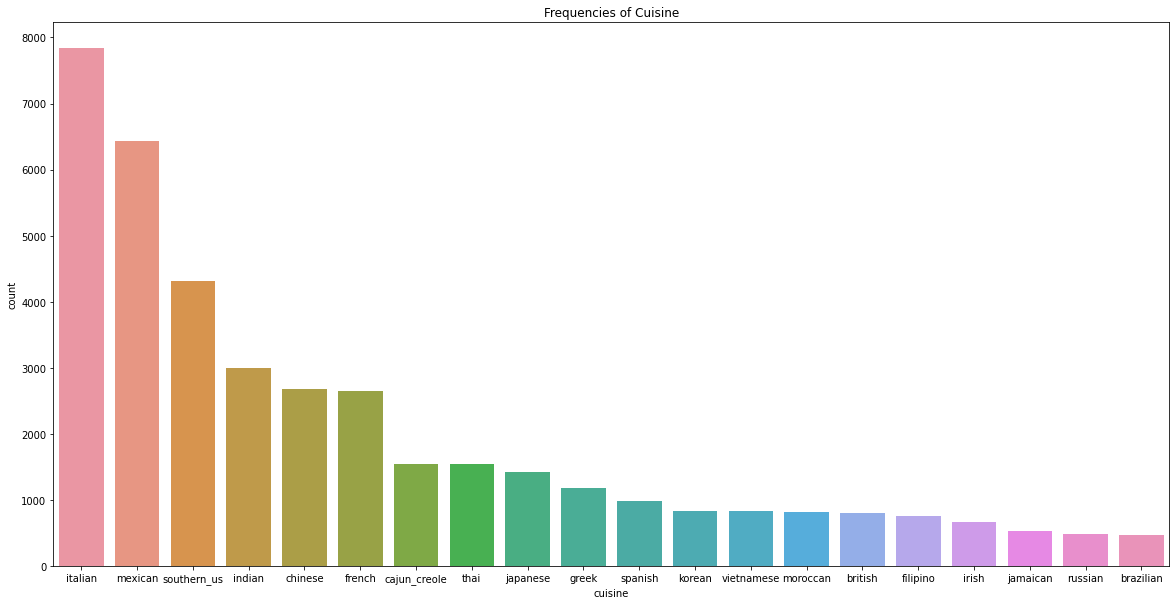

In [140]:

# ploting frequencies of cuisine from highest to lowest
plt.figure(figsize=(20,10))
sb.countplot(x=train['cuisine'],order = train['cuisine'].value_counts().index)
plt.title('Frequencies of Cuisine')

The plot depicts that the dataset mostly consists of Italian and Mexican recipes.

In [147]:
# making a list of all the ingredients 
ingredient_list = []
for x in train['ingredients']:
    for y in x:
        ingredient_list.append(y)

# creating dataframe of unique ingredients and their counts      
ingredient_list = pd.Series(ingredient_list)
data = ingredient_list.value_counts().sort_values(ascending=False)
data = pd.DataFrame(data,columns=['count'])
data.reset_index(inplace=True)
data = data.rename(columns={'index':'ingredient'})

In [150]:
print("The number of unique ingredients in the dataset: {}".format(len(data)))

The number of unique ingredients: 6714


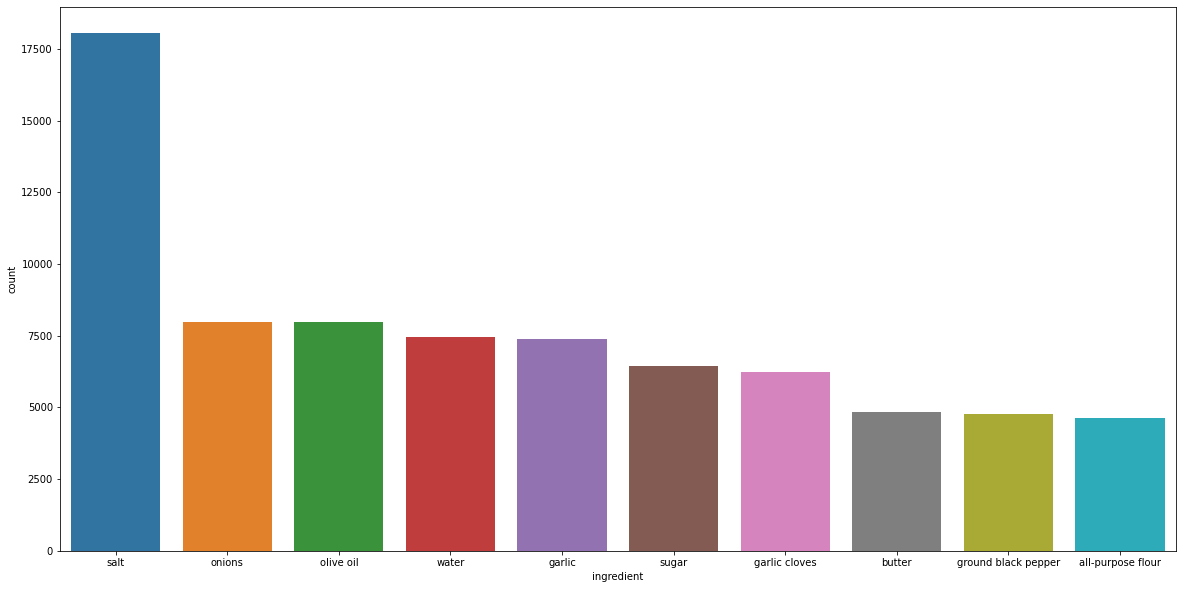

In [151]:
# plotting top 10 ingredients in the dataset 
plt.figure(figsize=(20,10))
sns.barplot(data=data.head(10), x="ingredient", y="count")

The plot depicts that salt is the most used ingredient in all the recipies.

In [152]:
# plotting least used ingredients in the dataset 
plt.figure(figsize=(20,10))
px.bar(data.tail(10), x="ingredient", y="count",color="ingredient")

<Figure size 1440x720 with 0 Axes>

This plot depicts the least used ingredients in the reciepies 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



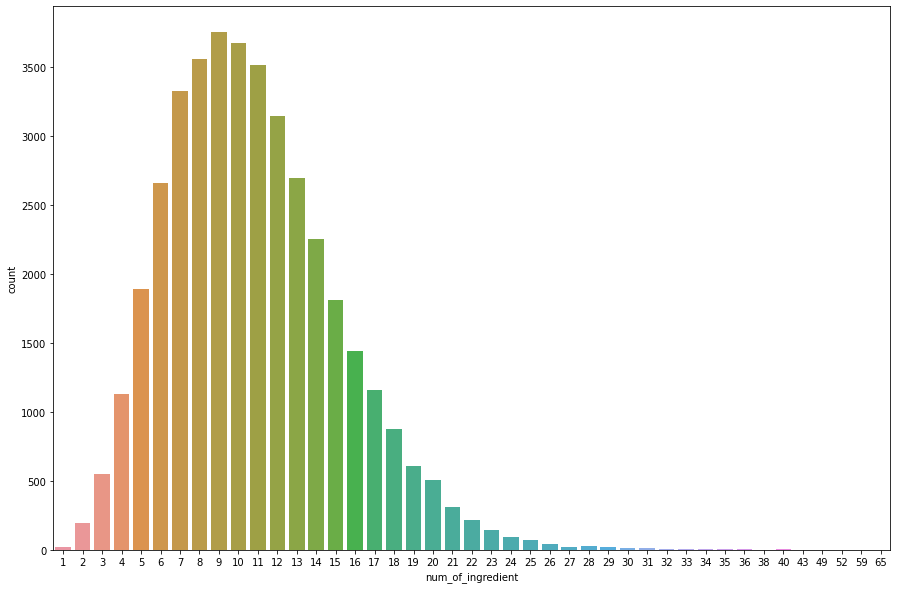

In [161]:
train['num_of_ingredient'] = train['ingredients'].apply(len)
numbers = train['ingredients'].apply(len).unique()

fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(train.num_of_ingredient)

The main takeaways from this plot are:
- Over 3,500 recipes have 10 ingredients 
- Very few recipes use more than 25 ingredients

In [123]:
# scatter plot of cuisine vs number of ingredient per recipe
px.scatter(train, x="cuisine", y="num_of_ingredient", color="cuisine",
                 size='num_of_ingredient', hover_data=['num_of_ingredient'])

The main takeaways from this plots are:
- Indian, Italian and Brazillian cuisines have recipes that use over 45 ingredients.
- Otherwise most cuisines have about 30 ingredients.

In [111]:
#counting the number of ingredients for each cuisine 
from collections import Counter
counters = {}
for cuisine in train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (train['cuisine'] == cuisine)
    for ingredients in train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

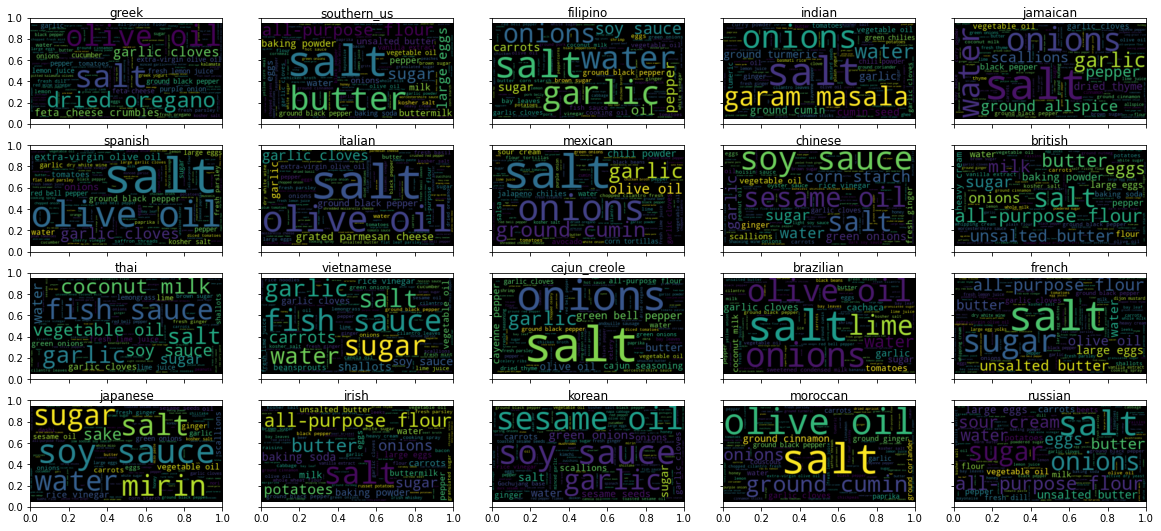

In [124]:
#generating wordclouds for each cuisine 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig, axes = plt.subplots(4, 5, figsize=(20, 9),sharex='col', sharey='row')
for cuisine, ax_index in zip(counters, range(1,21)): 
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=counters[cuisine])
    fig.add_subplot(4, 5, ax_index)    
    plt.title(cuisine)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

Each wordcloud represents the ingredients used in each cuisine and the size of each word corresponds to its frequency. The plot depicts the following:
- Salt is the most used ingredient in most of the cuisines.
- There are ingredients that are common in some cuisines but not in orders e.g. olive oil is common in Spanish, Italian, Moroccan, Greek and Brazillian cuisines but not common in the other cuisines.

## Data Preprocessing

The train and test dataset will be combined in this section. 

Our dataset comprises of only object data types and must be preprocessed before model implementation. 

There are two options that can be explored:

**Method 1**

Creating dummy variables for each ingredient, where each ingredient in the dataset will be represented as column and will be used as features for modelling.The data set will become a higher dimensional dataset. It is possible there are ingredients that do not help with prediction, principle component analysis will be to explore this possibility.


**METHOD 2**

Using TF-IDF vectorizer : generating vectors for each ingredient in the dataset and storing it in a sparse matrix to be passed to the model.Principle component analysis will be applied to the dataset to reduce the dimensions. This will be coupled with Kmeans to generate clusters of similar cuisines and pass that to the model. The elbow method will be used to determine the optimal number of clusters. This clustered data will be passed to the model.

## Modelling

In this section, three models will be implemented. The models were chosen based on the nature of our datasets:
- the number of classes to predict 
- the size of the data set

The models planned to be implemented include:
- Logistic Regression
- Linear Discriminant Analysis
- Support Vector Machine 

The evaluation metric to determine the performance of the model is accuracy and AUC-ROC. The Kaggle competition also provides a test data set for submission and uses accuracy for evaluation